In [ ]:
# torch.nn es para redes neuronales
#torch.optim es para atrear lo gradientes y hacer un back proapgation
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt


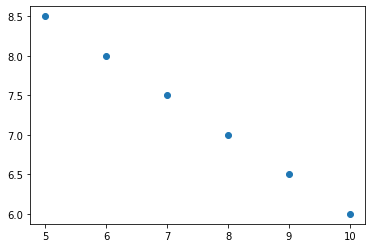

In [ ]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [ ]:
# el rechape (-1, 1) es para ponerlo en formato y despues convertirlo a tensor
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)

prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
# de aqui convertimos el arreglo numpy a tensor y el metodo requires_grad_ convirte a gradientes

# en ls unidades no necesito los gradientes porque es el target lo que voy a tratar de explicar
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.017725715413689613


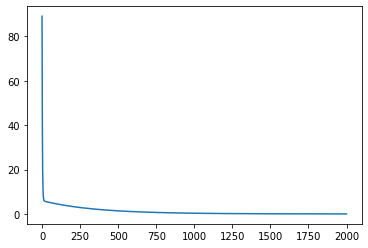

In [ ]:
#optim.SDG es estocastic gradient descent
model = nn.Linear(1, 1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [ ]:
x = torch.Tensor([[14.0]])
p = model(x)
p 

Regresion logística



In [ ]:
# Se pone entre 2 diagonales la division porque se van a dividir en enteros si no nos datria un numero flotante
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 0.56579061,  2.76250866],
       [ 4.786242  , -0.59052985],
       [ 4.94871268,  0.3751282 ],
       [-3.1970172 , -0.51253643],
       [ 1.08863346,  4.60565183],
       [-5.34647996, -4.93936252],
       [ 4.70661731, -0.49189058],
       [ 1.86044847,  4.72442589],
       [-2.24755729,  3.23232484],
       [-3.47407251, -0.06752247],
       [ 1.68432707, -0.9734912 ],
       [ 1.00457766,  3.96845272],
       [ 3.9745002 , -4.10380049],
       [ 0.70829837,  3.29328513],
       [ 0.4949123 , -0.261814  ],
       [ 1.50308363,  2.45830154],
       [-1.71558467, -2.20336687],
       [-2.15990519,  0.99246635],
       [-3.58308437, -4.00165257],
       [ 1.21212671, -2.76892587],
       [-6.03754403,  2.06502715],
       [ 1.90868889, -0.06857594],
       [ 1.50250977,  1.82972835],
       [-0.18666713, -0.85573173],
       [ 1.90119612, -0.7842782 ],
       [-3.65413799, -3.70022129],
       [-2.35224448, -4.00450494],
       [ 2.79299359,  1.70437005],
       [ 3.73401948,

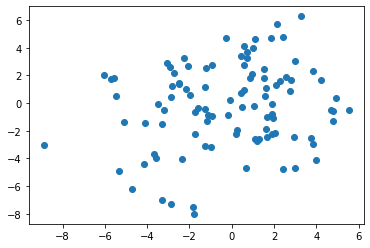

In [ ]:
plt.scatter(data[:,0], data[:,1])

In [ ]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))

In [ ]:
data[h:, :]= data[h:, :] + 3*np.ones((h, dimen))

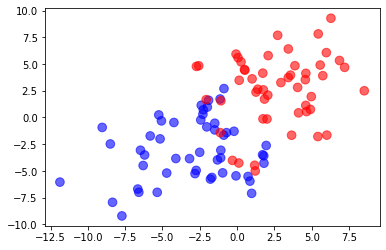

In [ ]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [ ]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

In [ ]:
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [ ]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])


In [ ]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')